In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch

from numba import jit

test = np.random.normal(0, 5, 10_000)

In [106]:
stepSize = (np.max(test) - np.min(test)) / 2
np.digitize(test, np.arange(np.min(test) + stepSize, np.max(test) + stepSize, stepSize))

np.max(test)

np.min(test)

stepSize

np.digitize(test, np.arange(np.min(test) + stepSize, np.max(test) + stepSize, stepSize))

np.arange(np.min(test) + stepSize, np.max(test) + stepSize, stepSize)

np.digitize(test, np.arange(np.min(test) + stepSize, np.max(test) + stepSize, stepSize))

array([0, 0, 0, ..., 1, 0, 1])

In [90]:
def bin_data(data, numBins = 5, minMax = (0,1)):
    stepSize = (minMax[1] - minMax[0]) / numBins
    binned = np.digitize(data, np.arange(minMax[0] + stepSize,minMax[1] + stepSize,stepSize))

    mapping = dict(zip(np.arange(0,numBins), 
                       np.round(np.arange(minMax[0] + stepSize/2,minMax[1],stepSize), 8)))

    return binned, mapping

In [105]:
results = [0]*20
for i in range(1,21):
    test_bin, test_map = bin_data(test, i, (np.min(test), np.max(test)))
    
    binned = np.array(list(map(lambda x : test_map[x],test_bin)))
        
    results[i-1]=np.mean((test - binned)**2)

KeyError: 1

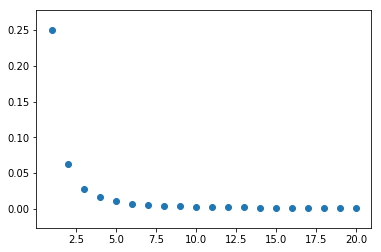

In [88]:
plt.scatter(np.arange(1,21), results);

In [ ]:
# fix this shit with np.linspace(1, 5, 11)

In [6]:
np.linspace(1,5,6)

array([1. , 1.8, 2.6, 3.4, 4.2, 5. ])